In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [2]:
df = pd.read_csv("../data/raw/imdb_reviews.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


/var/folders/km/f2sjhq8n5_5_gk1qvnf3h7ww0000gn/T/ipykernel_1751/3527756768.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


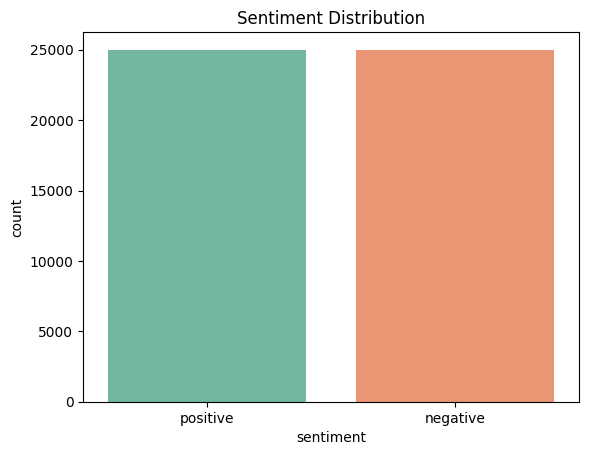

sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


In [4]:
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.savefig("../figures/sentimen_distribution.png")
plt.show()

print(df['sentiment'].value_counts(normalize=True) * 100)


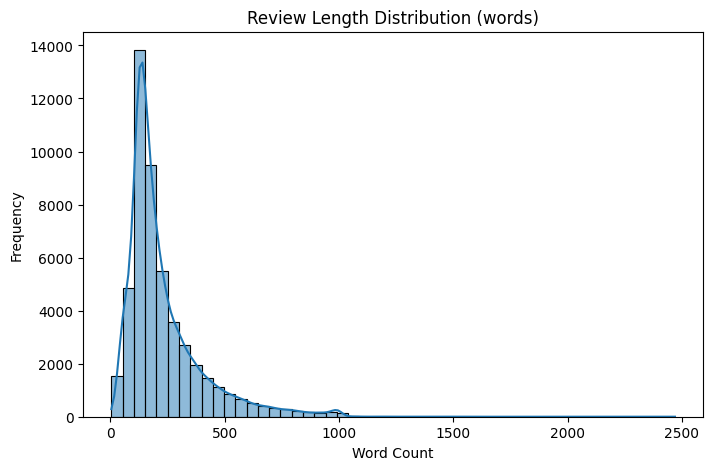

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64

In [5]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Review Length Distribution (words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.savefig("../figures/review_length_distribution")
plt.show()

df['review_length'].describe()


In [6]:
df = pd.read_csv("../data/processed/imdb_clean.csv")
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch oz episode hook rig...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,I think wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [7]:
pos_reviews = " ".join(df[df['sentiment'] == 'positive']['clean_review'])
neg_reviews = " ".join(df[df['sentiment'] == 'negative']['clean_review'])

pos_words = Counter(pos_reviews.split()).most_common(20)
neg_words = Counter(neg_reviews.split()).most_common(20)

print("Top Positive Words:", pos_words)
print("Top Negative Words:", neg_words)

Top Positive Words: [('I', 85662), ('film', 48773), ('movie', 43131), ('one', 26957), ('see', 24703), ('good', 21923), ('make', 19891), ('like', 19395), ('well', 16421), ('get', 16019), ('time', 15206), ('great', 14048), ('story', 13632), ('character', 13629), ('watch', 12479), ('go', 12442), ('show', 11825), ('love', 11460), ('would', 11245), ('think', 10927)]
Top Negative Words: [('I', 97033), ('movie', 55895), ('film', 42865), ('one', 25718), ('make', 23503), ('like', 23457), ('see', 22138), ('bad', 21088), ('get', 19336), ('good', 17655), ('would', 15219), ('even', 14921), ('go', 14797), ('watch', 14561), ('well', 14552), ('time', 14217), ('character', 13942), ('really', 12225), ('think', 11880), ('could', 11355)]


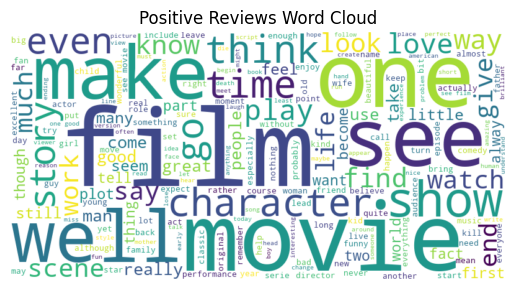

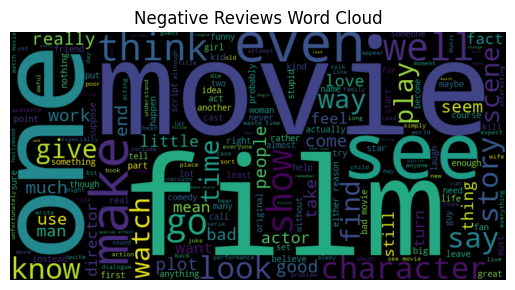

In [8]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
plt.savefig("../figures/positive_reviews_word_cloud")
plt.show()

wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(neg_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")
plt.savefig("../figures/negative_reviews_word_cloud")
plt.show()